In [14]:
#1 Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import requests and the API key.
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
#2 Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4784e54b6b719f5fecd9b08fd1475198


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | belyy yar
Processing Record 8 of Set 1 | maniitsoq
Processing Record 9 of Set 1 | marinette
Processing Record 10 of Set 1 | avera
Processing Record 11 of Set 1 | paracuru
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | cascais
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | alugan
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | kloulklubed
Proc

Processing Record 41 of Set 4 | vangaindrano
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | along
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | bam
Processing Record 47 of Set 4 | kirensk
Processing Record 48 of Set 4 | soe
Processing Record 49 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 50 of Set 4 | roma
Processing Record 1 of Set 5 | bethanien
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | marsa matruh
Processing Record 4 of Set 5 | molina
Processing Record 5 of Set 5 | thinadhoo
Processing Record 6 of Set 5 | batamshinskiy
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | ikom
Processing Record 9 of Set 5 | klaksvik
Processing Record 10 of Set 5 | akureyri
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 5 | chagoda
Processing Record 13 of Set 5 | shakhtinsk
Processing Record 14 of Set 5 | 

Processing Record 31 of Set 8 | pine bluff
Processing Record 32 of Set 8 | beidao
Processing Record 33 of Set 8 | jizan
Processing Record 34 of Set 8 | saint george
Processing Record 35 of Set 8 | tezu
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | santa cruz de la palma
Processing Record 38 of Set 8 | ovsyanka
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | salym
Processing Record 41 of Set 8 | graham
Processing Record 42 of Set 8 | mukhen
Processing Record 43 of Set 8 | muros
Processing Record 44 of Set 8 | khonuu
City not found. Skipping...
Processing Record 45 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | nuuk
Processing Record 48 of Set 8 | huarmey
Processing Record 49 of Set 8 | atar
Processing Record 50 of Set 8 | bathsheba
Processing Record 1 of Set 9 | picota
Processing Record 2 of Set 9 | pimentel
Processing Record 3 of Set 9 | seoul
Processing

Processing Record 16 of Set 12 | moose factory
Processing Record 17 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 12 | dunmore town
Processing Record 19 of Set 12 | zlobin
Processing Record 20 of Set 12 | san andres
Processing Record 21 of Set 12 | barbar
City not found. Skipping...
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | steubenville
Processing Record 24 of Set 12 | chilliwack
Processing Record 25 of Set 12 | pitkyaranta
Processing Record 26 of Set 12 | thetford mines
Processing Record 27 of Set 12 | finschhafen
Processing Record 28 of Set 12 | ganzhou
Processing Record 29 of Set 12 | harper
Processing Record 30 of Set 12 | rehoboth
Processing Record 31 of Set 12 | porto santo
Processing Record 32 of Set 12 | kodinsk
Processing Record 33 of Set 12 | cozumel
Processing Record 34 of Set 12 | dunajska streda
Processing Record 35 of Set 12 | araguaina
Processing Record 36 of Set 12 | college
Processing Record 37 of Set

In [21]:
len(city_data)

568

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Comodoro Rivadavia,-45.8667,-67.5000,64.26,39,0,16.11,AR,2022-11-09 04:12:45
1,East London,-33.0153,27.9116,65.34,100,100,6.91,ZA,2022-11-09 04:14:37
2,Rikitea,-23.1203,-134.9692,75.09,89,76,13.67,PF,2022-11-09 04:14:37
3,Punta Arenas,-53.1500,-70.9167,50.11,66,75,24.16,CL,2022-11-09 04:14:37
4,Busselton,-33.6500,115.3333,69.40,47,13,13.89,AU,2022-11-09 04:14:38
5,Vaini,-21.2000,-175.2000,78.96,78,75,8.05,TO,2022-11-09 04:14:38
6,Belyy Yar,53.6039,91.3903,28.85,85,75,0.00,RU,2022-11-09 04:09:52
7,Maniitsoq,65.4167,-52.9000,15.96,50,8,8.93,GL,2022-11-09 04:14:38
8,Marinette,45.1000,-87.6307,44.69,81,0,12.66,US,2022-11-09 04:14:39
9,Avera,33.1940,-82.5271,59.05,35,80,14.14,US,2022-11-09 04:14:39


In [24]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2022-11-09 04:12:45,-45.8667,-67.5000,64.26,39,0,16.11
1,East London,ZA,2022-11-09 04:14:37,-33.0153,27.9116,65.34,100,100,6.91
2,Rikitea,PF,2022-11-09 04:14:37,-23.1203,-134.9692,75.09,89,76,13.67
3,Punta Arenas,CL,2022-11-09 04:14:37,-53.1500,-70.9167,50.11,66,75,24.16
4,Busselton,AU,2022-11-09 04:14:38,-33.6500,115.3333,69.40,47,13,13.89
...,...,...,...,...,...,...,...,...,...
563,Livingston,GB,2022-11-09 04:28:56,55.9029,-3.5226,49.12,87,20,11.50
564,Nayoro,JP,2022-11-09 04:28:57,44.3506,142.4578,46.89,71,65,12.06
565,Lagunas,PE,2022-11-09 04:28:57,-5.2269,-75.6753,77.97,60,58,2.73
566,Ibitinga,BR,2022-11-09 04:28:57,-21.7578,-48.8289,67.12,42,44,7.72


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

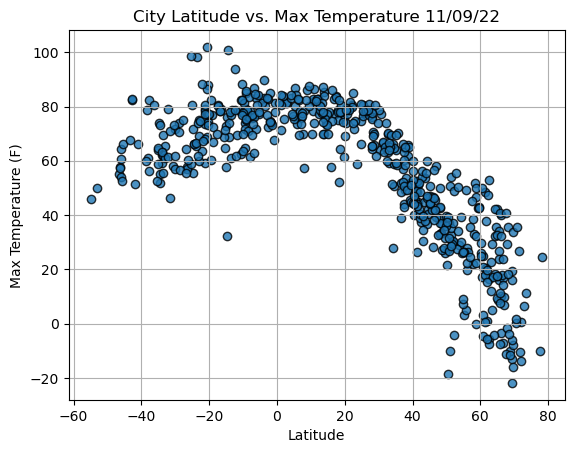

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

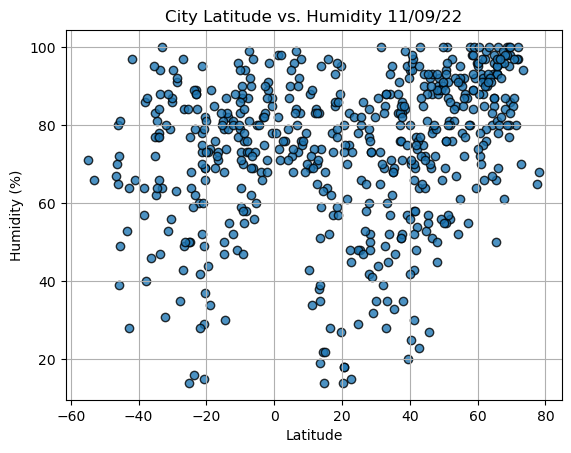

In [29]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

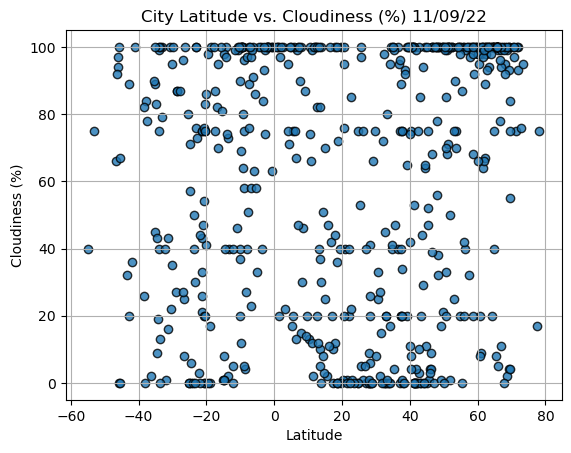

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

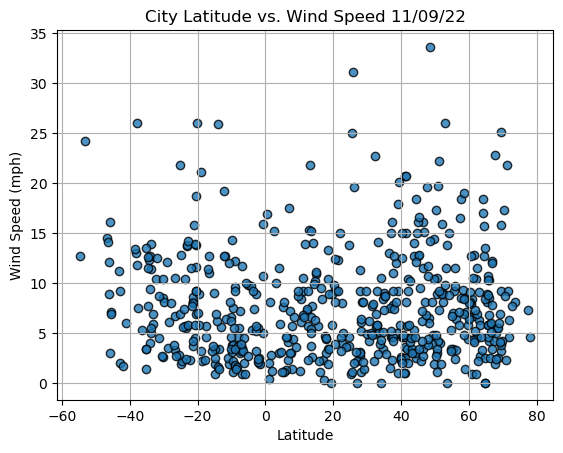

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()